In [1]:
import pandas as pd
from datetime import datetime

df = pd.read_csv('C:\\Users\\pedro\\Downloads\\material+curso+-+Time+Series\\material curso - Time Series\\alucel.csv')

In [3]:
df.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [4]:
df.dtypes

dia        object
vendas    float64
dtype: object

In [ ]:
df['dia'] = pd.to_datetime(df['dia'])
df.dtypes 

dia       datetime64[ns]
vendas           float64
dtype: object

In [8]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [9]:
df['aumento'] = df['vendas'].diff()
df.head()

,dia,vendas,aumento
0,2018-10-01,1374.83,NaN
1,2018-10-02,2185.69,810.86
2,2018-10-03,1860.36,-325.33
3,2018-10-04,1939.02,78.66
4,2018-10-05,1946.17,7.15


In [10]:
df['aceleracao'] = df['aumento'].diff()
df.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


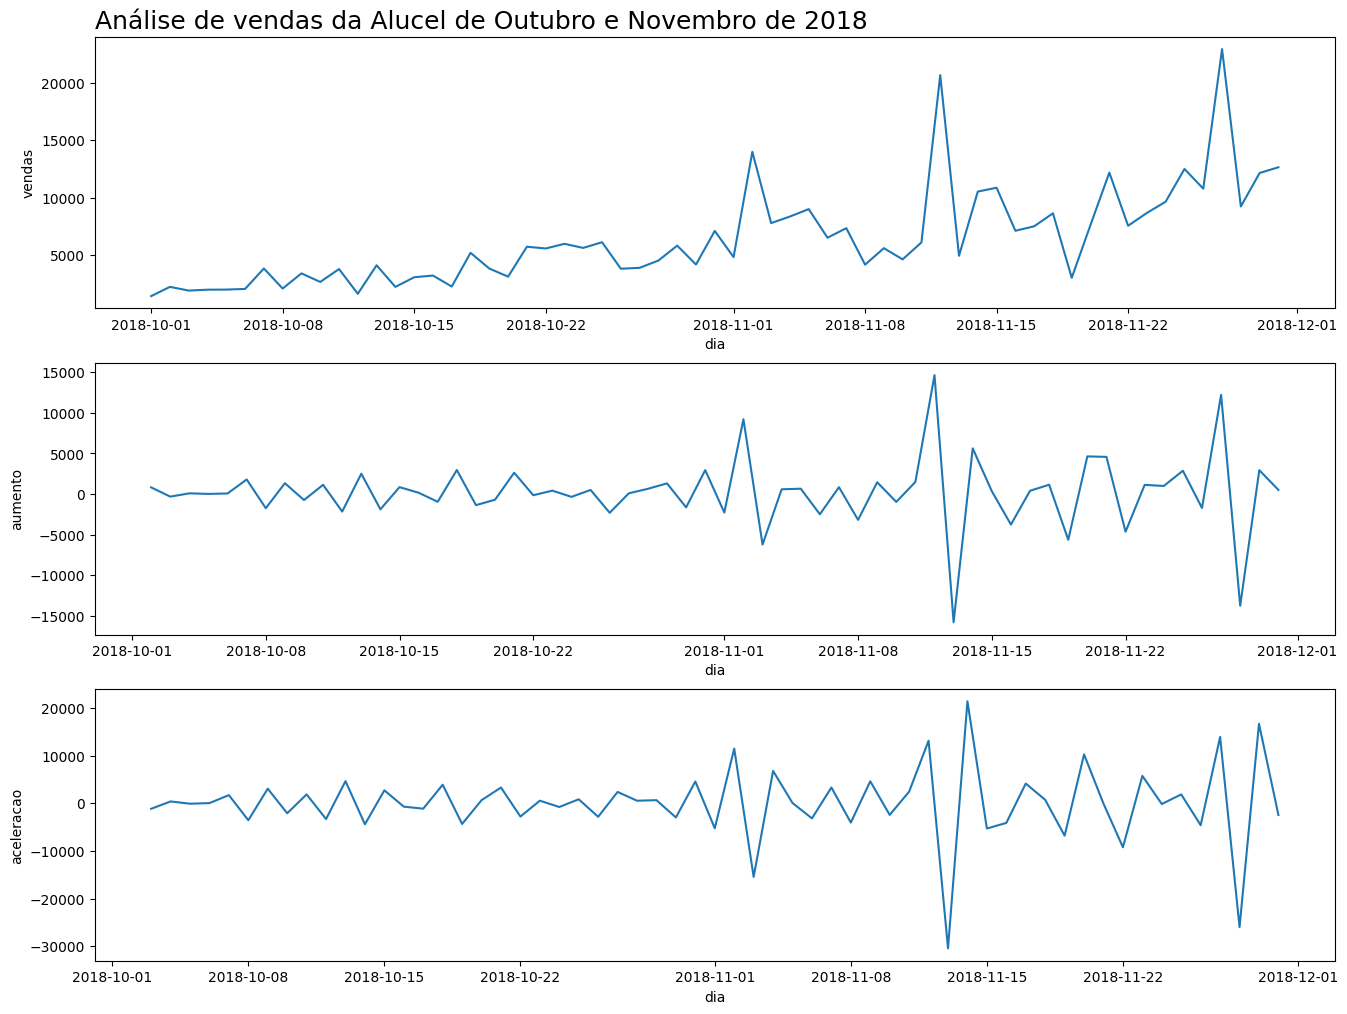

In [14]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da Alucel de Outubro e Novembro de 2018', fontsize=18, loc='left')
sns.lineplot(x='dia', y='vendas', data=df)
plt.subplot(3,1,2)
sns.lineplot(x='dia', y='aumento', data=df)
plt.subplot(3,1,3)
sns.lineplot(x='dia', y='aceleracao', data=df)
ax=ax


Normalizando os gráficos acima

In [15]:
df['media_movel'] = df['vendas'].rolling(7).mean()

In [16]:
df.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


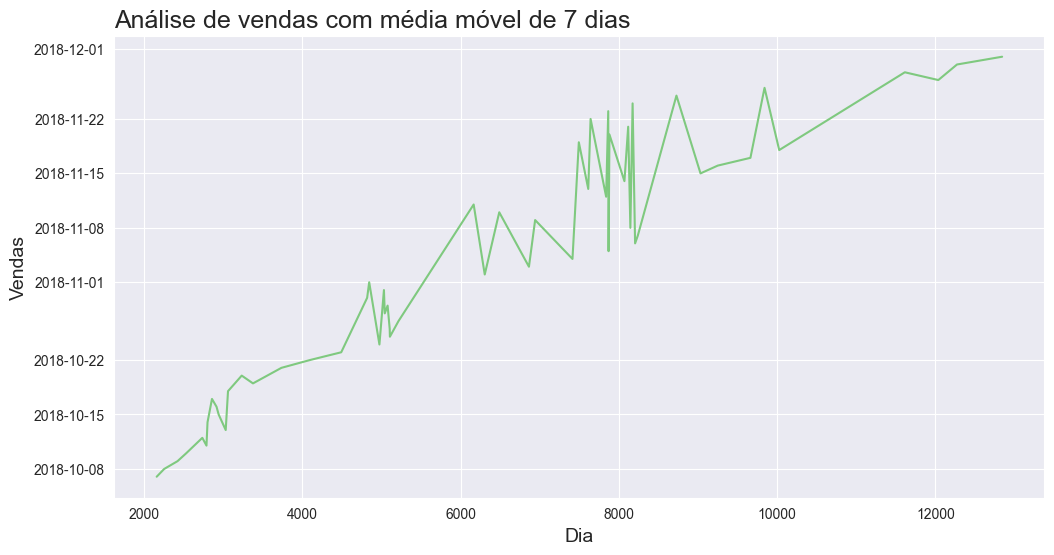

In [18]:
def plot(x, y, df, titulo, xlabel, ylabel):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=df)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax = ax


plot('media_movel', 'dia', df, 'Análise de vendas com média móvel de 7 dias', 'Dia', 'Vendas')